In [1]:
import meep as mp
from meep.materials import Au
import numpy as np
import math
import matplotlib.pyplot as plt

resolution = 80  # pixels/μm

radius = 1.0

wvl_min = 0.2
wvl_max = 1.2

dpml = 0.5*wvl_max
sz = 2*(2*dpml+radius)
cell_size = mp.Vector3(z=sz)
pml_layers = [mp.PML(dpml)]

fmin = 1/wvl_max
fmax = 1/wvl_min
fcen = 0.5*(fmax+fmin)
df = fmax-fmin
nfreq = 100

sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df,is_integrated=True), component=mp.Ex, center=mp.Vector3(z=-0.5*sz+dpml))]

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions=1,
                    resolution=resolution)

refl_fr = mp.FluxRegion(center=mp.Vector3(z=-radius-0.5*dpml))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(), 1e-9))

empty_flux = mp.get_fluxes(refl)
empty_data = sim.get_flux_data(refl)
sim.reset_meep()

geometry = [mp.Sphere(radius=radius, center=mp.Vector3(), material=Au)]

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    dimensions=1,
                    resolution=resolution)

refl = sim.add_flux(fcen, df, nfreq, refl_fr)
sim.load_minus_flux_data(refl, empty_data)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(), 1e-9))

refl_flux = mp.get_fluxes(refl)
R_meep = -1*np.divide(refl_flux,empty_flux)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000118971 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 4.4 with resolution 80
time for set_epsilon = 0.00020504 s
-----------
field decay(t = 50.00625): 0.2526508967262588 / 0.2526508967262588 = 1.0
field decay(t = 100.0125): 2.823003198446281e-16 / 0.2526508967262588 = 1.1173533262796757e-15
run 0 finished at t = 100.0125 (16002 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 4.31538e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 4.4 with resolution 80
     sphere, center = (0,0,0)
          radius 1
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.000283957 s
lorentzian susceptibility: frequency=10.7433, gamma=1.78571
lorentzian susceptibility: frequency=3.47141, gamma=2.01155
lorentzian susceptibility: frequency=2.39466, gamma=0.701702
lorentzian susceptibility: frequency=0.66944, gamma=0.278261
lorentzian susceptibilit

/home/mcgineo/miniconda3/envs/mp/lib/python3.9/site-packages/meep/simulation.py:1343: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/home/mcgineo/miniconda3/envs/mp/lib/python3.9/site-packages/meep/simulation.py:1347: RuntimeWarning: DFT frequency 5.0 is out of material's range of 0.16131113692089302-4.0327458966810505
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


field decay(t = 50.00625): 1.6982314049782504e-20 / 1.6982314049782504e-20 = 1.0
field decay(t = 100.0125): 1.3285602201252447e-23 / 1.6982314049782504e-20 = 0.0007823198983546414
field decay(t = 150.01875): 1.475535985102337e-24 / 1.6982314049782504e-20 = 8.688662692121363e-05
on time step 29415 (time=183.844), 0.000135988 s/step
field decay(t = 200.025): 3.1989722058349845e-25 / 1.6982314049782504e-20 = 1.8837080720904193e-05
field decay(t = 250.03125): 1.278303320600038e-25 / 1.6982314049782504e-20 = 7.52726228506185e-06
field decay(t = 300.0375): 4.0473637209236565e-26 / 1.6982314049782504e-20 = 2.3832816358589788e-06
field decay(t = 350.04375000000005): 1.68132384358256e-26 / 1.6982314049782504e-20 = 9.90044017943534e-07
on time step 61441 (time=384.006), 0.000124899 s/step
field decay(t = 400.05): 5.692569193139589e-27 / 1.6982314049782504e-20 = 3.35205742659817e-07
field decay(t = 450.05625000000003): 2.1942813540269624e-27 / 1.6982314049782504e-20 = 1.2920979718044166e-07
field

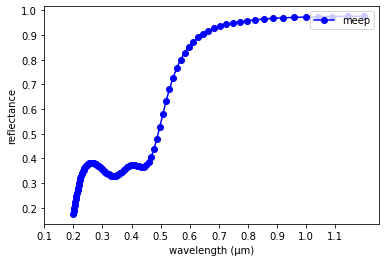

In [3]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1,freqs)

plt.figure()
plt.plot(wvls,R_meep,'bo-',label='meep')
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.xticks([t for t in np.arange(0.1,1.2,0.1)])
plt.legend(loc='upper right')
plt.show()